In [1]:
from typing import List
import numpy as np
from vector_space_model import VectorSpaceModel

Preprocessed data not found. The system is going to make new indexes.
Stop words loaded successfully.
Parsing	ResearchPapers\1.txt
Parsing	ResearchPapers\11.txt
Parsing	ResearchPapers\12.txt
Parsing	ResearchPapers\13.txt
Parsing	ResearchPapers\14.txt
Parsing	ResearchPapers\15.txt
Parsing	ResearchPapers\16.txt
Parsing	ResearchPapers\17.txt
Parsing	ResearchPapers\18.txt
Parsing	ResearchPapers\2.txt
Parsing	ResearchPapers\21.txt
Parsing	ResearchPapers\22.txt
Parsing	ResearchPapers\23.txt
Parsing	ResearchPapers\24.txt
Parsing	ResearchPapers\25.txt
Parsing	ResearchPapers\26.txt
Parsing	ResearchPapers\3.txt
Parsing	ResearchPapers\7.txt
Parsing	ResearchPapers\8.txt
Parsing	ResearchPapers\9.txt

Saving all computed indexes on the drive.
Total entires in the collection	20.
14798


In [2]:
vector_space_model = VectorSpaceModel(
    documents_path="ResearchPapers",
    stop_words_file_path="Stopword-List.txt",
)
vector_space_model.initiate()

Preprocessed data not found. The system is going to make new indexes.
Stop words loaded successfully.
Parsing	ResearchPapers\1.txt
Parsing	ResearchPapers\11.txt
Parsing	ResearchPapers\12.txt
Parsing	ResearchPapers\13.txt
Parsing	ResearchPapers\14.txt
Parsing	ResearchPapers\15.txt
Parsing	ResearchPapers\16.txt
Parsing	ResearchPapers\17.txt
Parsing	ResearchPapers\18.txt
Parsing	ResearchPapers\2.txt
Parsing	ResearchPapers\21.txt
Parsing	ResearchPapers\22.txt
Parsing	ResearchPapers\23.txt
Parsing	ResearchPapers\24.txt
Parsing	ResearchPapers\25.txt
Parsing	ResearchPapers\26.txt
Parsing	ResearchPapers\3.txt
Parsing	ResearchPapers\7.txt
Parsing	ResearchPapers\8.txt
Parsing	ResearchPapers\9.txt

Saving all computed indexes on the drive.
Total entires in the collection	20.


1

In [4]:
X = []
doc_seq = []
for i in vector_space_model.vsm_index:
    doc_seq.append(int(i[0]))
    X.append(i[1])
y = vector_space_model.make_y(doc_seq=doc_seq)
# X = np.array(X)

X
# from sklearn.preprocessing import Normalizer

# transformer = Normalizer().fit(X)  # fit does nothing.
# B = transformer.transform(X)


[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.00322744, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.0231434 , 0.01361679, 0.02465035, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.01400243, 0.04501783, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.00296412, 0.        , 0.08007627, ..., 0.        , 0.        ,
        0.        ]),
 array([0.01357073, 0.00342195, 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.00297531, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.00305912, 0.03524111, ..., 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.        , 0.02098726, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array

For k=3, Silhouette Score: 0.10016653285323537
For k=5, Silhouette Score: 0.12728284030160625
For k=7, Silhouette Score: 0.2349090834799498
Best K: 7


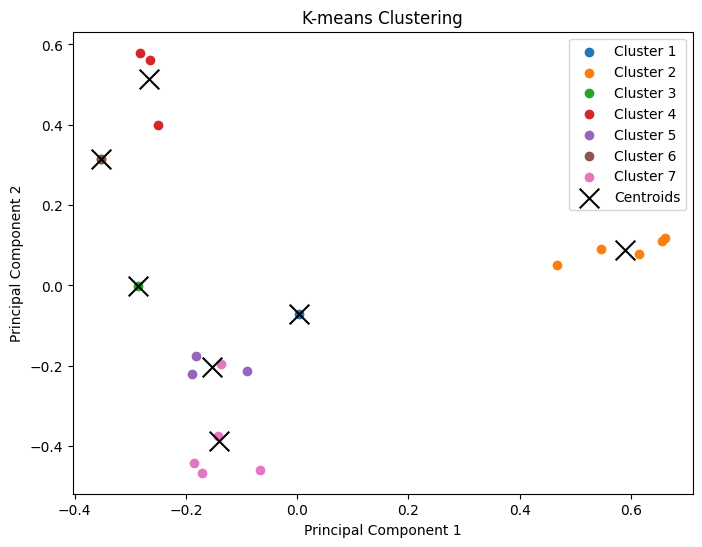

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
import matplotlib.pyplot as plt
import os

docs = []
doc_seq = os.listdir("ResearchPapers/")

for i in doc_seq:
    with open(os.path.join("ResearchPapers/", i), 'r') as file:
        docs.append(file.read())
    
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import os

docs = []
doc_seq = os.listdir("ResearchPapers/")

for i in doc_seq:
    with open(os.path.join("ResearchPapers/", i), 'r') as file:
        docs.append(file.read())
    
# Text preprocessing and vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=0.1)
X = vectorizer.fit_transform(docs)

# Experiment with different values of K
k_values = [3, 5, 7]  # Adjust as needed
best_score = -1
best_k = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    print(f"For k={k}, Silhouette Score: {silhouette_avg}")
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

# Choose the best K
print(f"Best K: {best_k}")

# Apply K-means clustering with the best K
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components=2).fit(X.toarray())
data2D = pca.transform(X.toarray())
centroids2D = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))

for i in range(best_k):
    plt.scatter(data2D[labels == i, 0], data2D[labels == i, 1], label=f'Cluster {i+1}')

plt.scatter(centroids2D[:, 0], centroids2D[:, 1], marker='x', s=200, c='black', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# # Standardize features
# # scaler = StandardScaler()
# # X_scaled = scaler.fit_transform(X)

# # Apply K-means clustering
# kmeans = KMeans(n_clusters=5)
# kmeans.fit(X)
# cluster_labels = kmeans.labels_

# # Reduce dimensionality for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

# # Visualize the clusters
# plt.figure(figsize=(5,5))

# print(cluster_labels)
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)

# plt.title('K-means Clustering of Iris Dataset')
# plt.legend()
# plt.show()